# 전처리_건희

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [299]:
df_raw = pd.read_csv('data/#Final_Check.csv',encoding='cp949',index_col=0)
df_raw.columns

Index(['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '상태', '접수일', '직영', '위탁'], dtype='object')

In [307]:
df_raw
# 337426

,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일,직영,위탁
0,7,1,0,3.10,0,3,1,2017,1.0,NaN
1,3,2,0,7.95,0,3,1,2017,1.0,NaN
2,4,4,1,2.75,0,2,1,2017,1.0,NaN
3,4,3,0,4.00,1,1,1,2017,1.0,NaN
4,7,3,1,3.00,1,5,1,2017,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
337421,3,1,0,3.50,2,3,1,2021,NaN,1.0
337422,9,1,1,7.20,1,2,1,2021,NaN,1.0
337423,9,5,1,3.74,0,0,0,2021,NaN,1.0
337424,9,4,1,8.00,0,3,0,2021,NaN,1.0


In [312]:
df_process =  df_raw.iloc[:, :-3]
df_process = df_process[df_process["중성화여부"]!=1]

In [313]:
df_process
# 337426-> 236650

,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,7,1,0,3.10,0,3,1
1,3,2,0,7.95,0,3,1
2,4,4,1,2.75,0,2,1
8,3,1,1,1.20,0,1,1
9,3,5,0,5.40,2,1,1
...,...,...,...,...,...,...,...
337420,3,1,0,4.10,2,1,1
337421,3,1,0,3.50,2,3,1
337423,9,5,1,3.74,0,0,0
337424,9,4,1,8.00,0,3,0


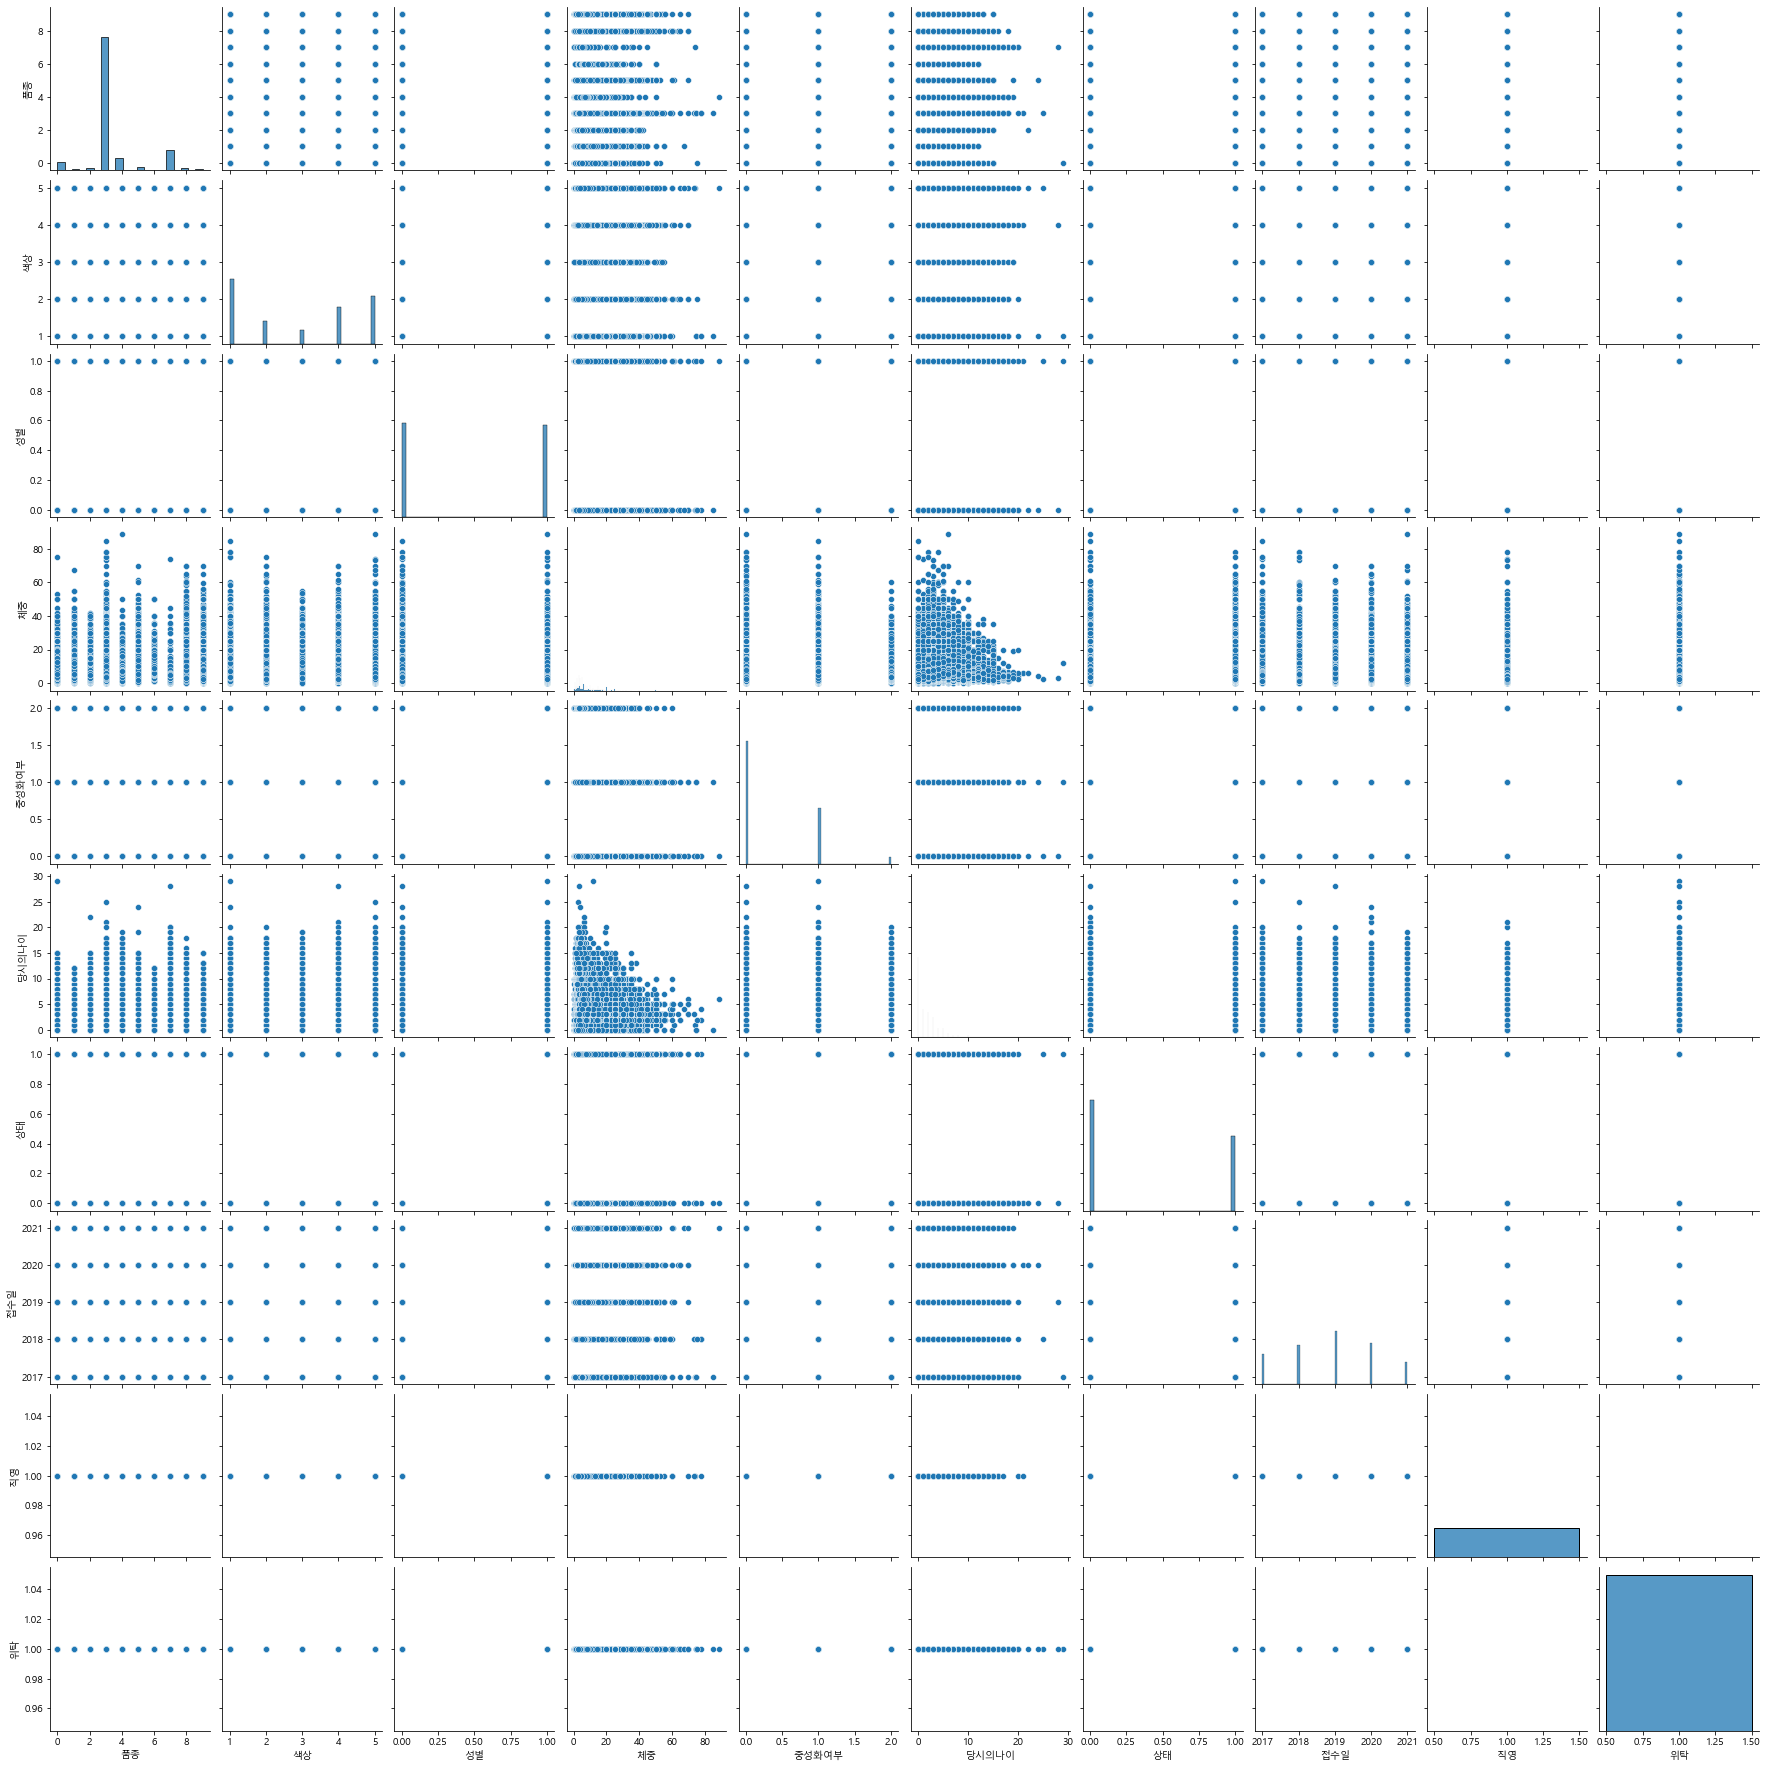

In [294]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.pairplot(df_test)

In [ ]:
df_test

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
sns.violinplot(data = df_test, x = "품종", y = "체중")

In [ ]:
sns.boxplot(data = df_test["체중"])

In [314]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
oulier_idx = get_outlier(df=df_process, column='체중', weight=1.5)
df_process.drop(outlier_idx, axis=0, inplace=True)

In [315]:
df_process
#236650 -> 223076

,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,7,1,0,3.10,0,3,1
1,3,2,0,7.95,0,3,1
2,4,4,1,2.75,0,2,1
8,3,1,1,1.20,0,1,1
9,3,5,0,5.40,2,1,1
...,...,...,...,...,...,...,...
337420,3,1,0,4.10,2,1,1
337421,3,1,0,3.50,2,3,1
337423,9,5,1,3.74,0,0,0
337424,9,4,1,8.00,0,3,0


## 👀 df_test 체중 날려 , 중성화도 날림

In [141]:
df_test # 체중 아웃라이어 제거 후

,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일
0,7,1,0,3.10,0,3,1,2017
1,3,2,0,7.95,0,3,1,2017
2,4,4,1,2.75,0,2,1,2017
8,3,1,1,1.20,0,1,1,2017
9,3,5,0,5.40,2,1,1,2017
...,...,...,...,...,...,...,...,...
337420,3,1,0,4.10,2,1,1,2021
337421,3,1,0,3.50,2,3,1,2021
337423,9,5,1,3.74,0,0,0,2021
337424,9,4,1,8.00,0,3,0,2021


In [150]:
df_test[df_test["중성화여부"] ==1]["성별"].value_counts()

1    62974
0    37802
Name: 성별, dtype: int64

In [316]:
df_process["중성화여부"].value_counts()

0    213472
2      9604
Name: 중성화여부, dtype: int64

In [ ]:
plt.figure(figsize = (20, 5))

sns.boxenplot(data = outlier, x  ="품종", y = "체중")

In [ ]:
#품종별 중성화 여부

df_test.groupby(["품종", "성별"]).count()

In [ ]:
plt.figure(figsize = (20, 5))

sns.boxenplot(data = df_test, x  ="품종", y = "체중")

In [ ]:
sns.boxplot(x="", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

In [ ]:
df_test

In [ ]:
plt.figure(figsize = (20, 5))

sns.violinplot(data = df_test, x="품종", y="체중")
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

![캡처](C:|Users|user|Desktop|캡처.png)

In [ ]:
plt.figure(figsize = (20, 5))

sns.violinplot(data = df_test, x="품종", y="당시의나이")
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

In [ ]:
plt.figure(figsize = (20, 5))

sns.boxplot(data = df_test["나이"])

<AxesSubplot:xlabel='품종', ylabel='당시의나이'>

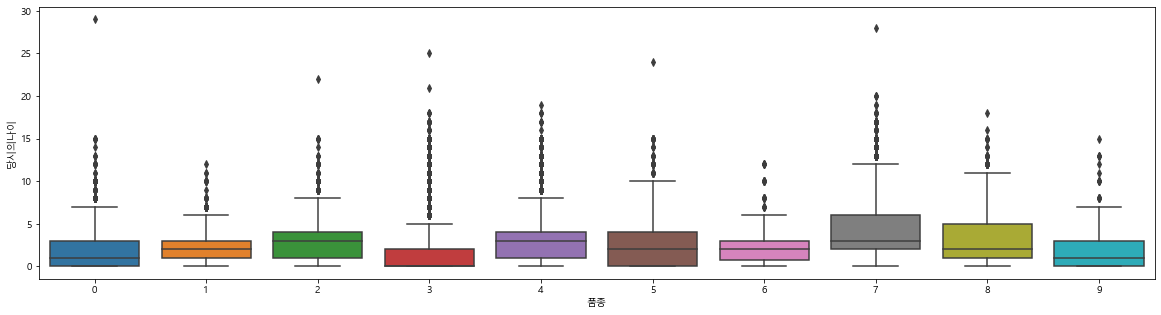

In [134]:
plt.figure(figsize = (20, 5))

sns.boxplot(data = df_test, x = "품종", y = "당시의나이")

In [273]:
df_test[df_test["당시의나이"]== 0]["상태"].value_counts()

0    89028
1    56139
Name: 상태, dtype: int64

<AxesSubplot:xlabel='당시의나이', ylabel='count'>

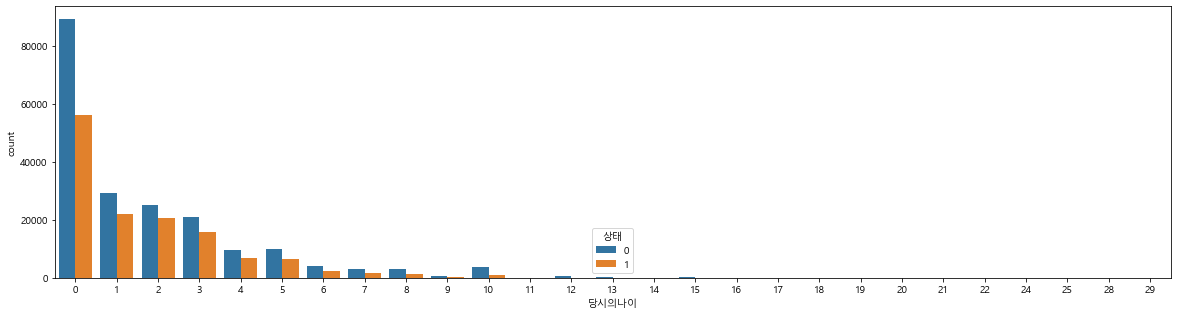

In [274]:
plt.figure(figsize = (20, 5))

sns.countplot(data = df_test, x = "당시의나이", hue = "상태")

<AxesSubplot:xlabel='색상', ylabel='count'>

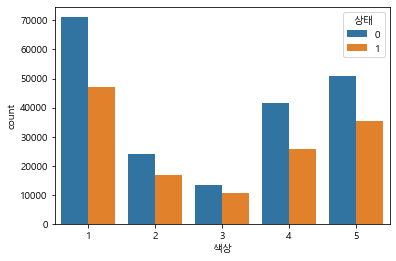

In [277]:
sns.countplot(data = df_test, x = "색상", hue = "상태")

<AxesSubplot:xlabel='성별', ylabel='count'>

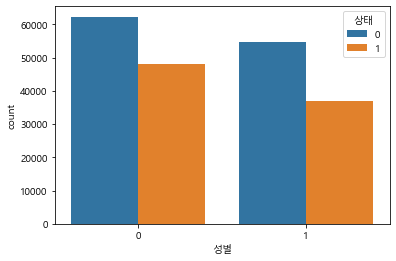

In [260]:
sns.countplot(data = df, x = "성별", hue = "상태")

<AxesSubplot:>

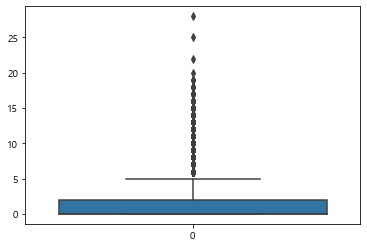

In [151]:
sns.boxplot(data = df["당시의나이"])

## 나이 날려

In [318]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df_process, column='당시의나이', weight=1.5)
df_process.drop(outlier_idx, axis=0, inplace=True)

In [416]:
df_process
#223076 -> 221522

,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,7,1,0,3.10,0,3,1
1,3,2,0,7.95,0,3,1
2,4,4,1,2.75,0,2,1
8,3,1,1,1.20,0,1,1
9,3,5,0,5.40,2,1,1
...,...,...,...,...,...,...,...
337420,3,1,0,4.10,2,1,1
337421,3,1,0,3.50,2,3,1
337423,9,5,1,3.74,0,0,0
337424,9,4,1,8.00,0,3,0


In [321]:
df_process.describe()

,품종,색상,성별,체중,중성화여부,당시의나이,상태
count,221522.000000,221522.000000,221522.000000,221522.000000,221522.000000,221522.000000,221522.000000
mean,3.326564,2.898620,0.443220,6.116958,0.086195,1.180804,0.419538
std,1.473663,1.652636,0.496767,6.054532,0.406153,1.492802,0.493485
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,2.100000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,1.000000,7.400000,0.000000,2.000000,1.000000
max,9.000000,5.000000,1.000000,78.000000,2.000000,5.000000,1.000000


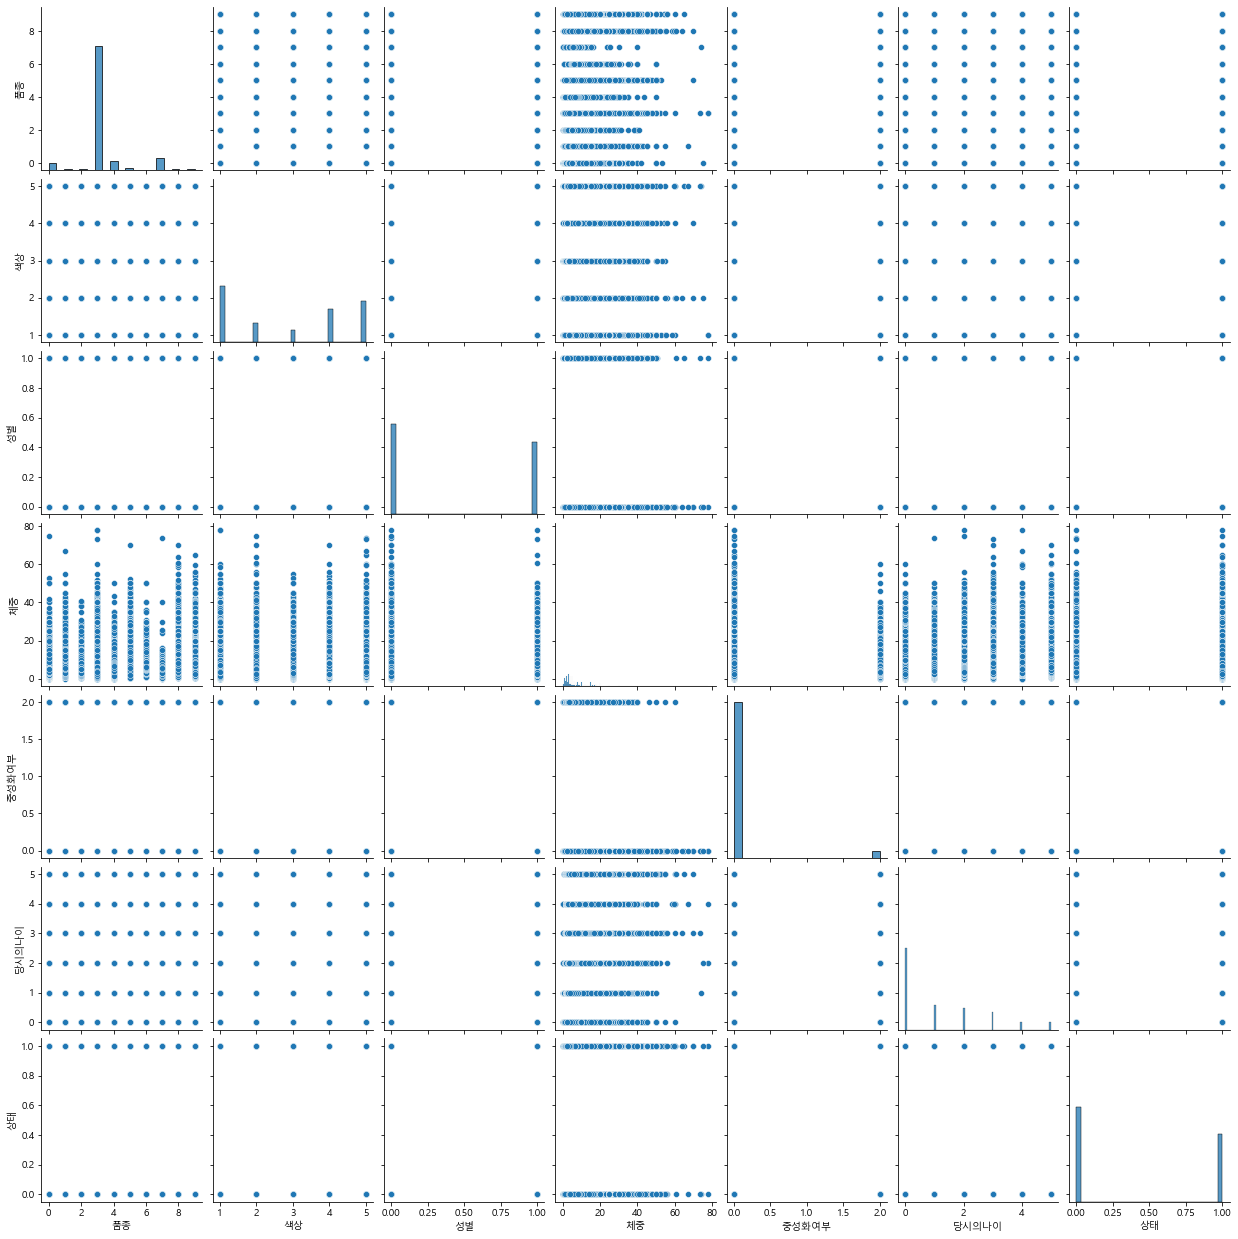

In [326]:
sns.pairplot(data = df_process)

<AxesSubplot:xlabel='품종', ylabel='당시의나이'>

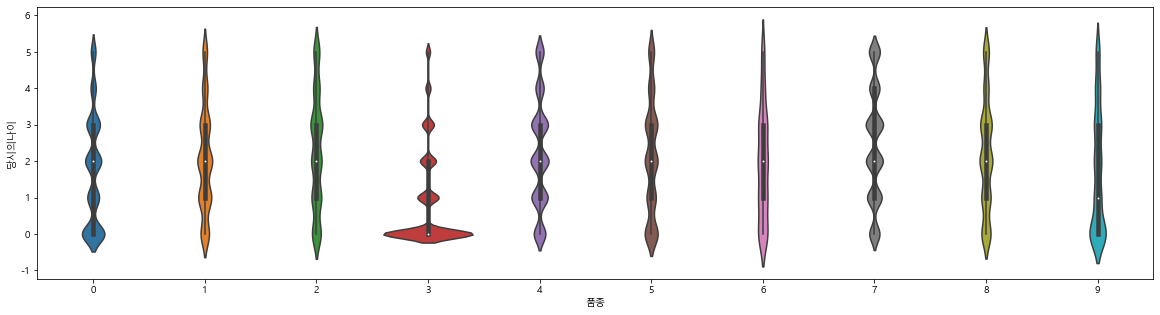

In [322]:
plt.figure(figsize = (20, 5))
sns.violinplot(data = df_process, x = "품종", y = "당시의나이")

## sklearn

In [184]:
# 필요한 Library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 

In [327]:
df_process.head()

,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,7,1,0,3.10,0,3,1
1,3,2,0,7.95,0,3,1
2,4,4,1,2.75,0,2,1
8,3,1,1,1.20,0,1,1
9,3,5,0,5.40,2,1,1


In [417]:
df_mix = df_process[df_process["품종"] != 3]
df_mix
# 169346
# 믹스견 아닌거 52176 마리
# df_mix = df_mix[df_mix["당시의나이"]!= 0]

,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,7,1,0,3.10,0,3,1
2,4,4,1,2.75,0,2,1
12,4,1,0,2.00,0,2,1
22,0,1,0,23.00,0,2,0
23,7,1,0,2.80,2,2,1
...,...,...,...,...,...,...,...
337418,9,4,1,6.60,0,3,1
337419,9,4,1,2.40,0,0,1
337423,9,5,1,3.74,0,0,0
337424,9,4,1,8.00,0,3,0


In [418]:
df_mix["품종"].value_counts()

7    17237
4    13221
0    10165
5     3909
2     2061
8     1957
1     1918
9     1279
6      429
Name: 품종, dtype: int64

In [365]:
df = df.iloc[:, :-1]
df

,const,품종,색상,성별,체중,중성화여부,당시의나이
1,1.0,3,2,0,7.95,0,3
8,1.0,3,1,1,1.20,0,1
9,1.0,3,5,0,5.40,2,1
13,1.0,3,1,0,3.00,0,3
16,1.0,3,5,0,6.00,0,2
...,...,...,...,...,...,...,...
337297,1.0,3,3,1,5.00,0,1
337298,1.0,3,3,0,6.00,0,1
337304,1.0,3,3,0,6.00,0,2
337420,1.0,3,1,0,4.10,2,1


In [ ]:
df_p = df.dropna().drop["const","ZIP code"], axis=1, inplace = False)

In [419]:
df = sm.add_constant(df_mix,has_constant = "add")
df.head()

,const,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,1.0,7,1,0,3.10,0,3,1
2,1.0,4,4,1,2.75,0,2,1
12,1.0,4,1,0,2.00,0,2,1
22,1.0,0,1,0,23.00,0,2,0
23,1.0,7,1,0,2.80,2,2,1


In [397]:
df["품종"].value_counts()

7    15041
4    11264
0     7054
5     3051
2     1719
1     1631
8     1622
9      821
6      336
Name: 품종, dtype: int64

In [ ]:
#나이랑 체중

In [282]:
# feature_columns = df_mix.columns.difference(["상태"])
# feature_columns

Index(['const', '당시의나이', '색상', '성별', '중성화여부', '체중', '품종'], dtype='object')

In [420]:
# 대출여부는 1 or 0으로 결정된다. 즉 target이 1/0의 값을 갖기에
# 로지스틱 회귀모형이 적합하다.

feature_columns = df.columns.difference(["상태"])
X = df[feature_columns]
y = df["상태"]

In [421]:
feature_columns

Index(['const', '당시의나이', '색상', '성별', '중성화여부', '체중', '품종'], dtype='object')

In [422]:
train_X, test_X ,train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(36523, 7) (15653, 7) (36523,) (15653,)


In [423]:
model = sm.Logit(train_y, train_X)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.608226
         Iterations 5


In [424]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     상태   No. Observations:                36523
Model:                          Logit   Df Residuals:                    36516
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                 0.02877
Time:                        16:28:35   Log-Likelihood:                -22214.
converged:                       True   LL-Null:                       -22872.
Covariance Type:            nonrobust   LLR p-value:                3.839e-281
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7086      0.035     20.413      0.000       0.641       0.777
당시의나이         -0.1844      0.008    -24.375      0.000      -0.199      -0.170
색상             0.0276      0.007      3.895      0.000       0.014       0.042
성별             0.1581      0.026      6.195      0.000       0.108       0.208
중성화여부          0.1847      0.018     10.495      0.000       0.150       0.219
체중            -0.0115      0.002     -7.482      0.000      -0.015      -0.009
품종             0.0890      0.004     20.865      0.000       0.081       0.097
==============================================================================
"""

In [425]:
results.params

const    0.708565
당시의나이   -0.184407
색상       0.027618
성별       0.158085
중성화여부    0.184667
체중      -0.011519
품종       0.089040
dtype: float64

In [426]:
np.exp(results.params)

const    2.031074
당시의나이    0.831598
색상       1.028003
성별       1.171266
중성화여부    1.202817
체중       0.988547
품종       1.093125
dtype: float64

In [427]:
pred_y = results.predict(test_X)
pred_y

97874     0.786261
203040    0.657266
278414    0.718174
295275    0.553610
67258     0.640092
            ...   
229049    0.817677
11358     0.637733
155400    0.724550
191088    0.597718
65269     0.737001
Length: 15653, dtype: float64

In [428]:

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

97874     1
203040    1
278414    1
295275    1
67258     1
         ..
229049    1
11358     1
155400    1
191088    1
65269     1
Length: 15653, dtype: int32

In [429]:
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[  349  4647]
 [  253 10404]]


In [430]:
cfmat[1,1]

10404

In [431]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
 return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

In [432]:
acc(cfmat)

0.6869609659490193

In [433]:
# 임계값 0~1에 따른 정확도 확인

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
	pred_Y = cut_off(pred_y,i)
	cfmat = confusion_matrix(test_y,pred_Y)
	table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.680828
0.1,0.680828
0.2,0.680828
0.3,0.680828
0.4,0.681531
0.5,0.686961
0.6,0.664345
0.7,0.563279
0.8,0.356034


In [434]:
import sklearn.metrics as metrics

AUC: 0.6134357424947183


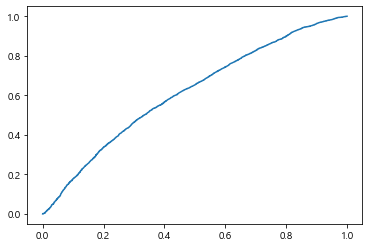

In [435]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

# 여기서부터 💔

In [ ]:
RAW = pd.read_csv('FINAL_DOG_DOG.csv',encoding='euc-kr',index_col=0)

In [149]:
df_test = pd.read_csv('data/#Final_Check.csv',encoding='cp949',index_col=0)
df_test.columns

Index(['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '상태', '접수일', '직영', '위탁'], dtype='object')

In [ ]:
df_test['나이'].unique()

In [ ]:
df_test[]

In [ ]:
df_test['나이'] = df_test['나이'].apply(lambda x : x[:-4])
df_test['나이'].unique()

In [ ]:
df_test['나이'] = df_test['나이'].replace('','바보')

In [ ]:
df_test['나이'] = df_test.replace('`','바보')
df_test['나이'] = df_test.replace('-','바보')


In [ ]:
df_test['나이'].unique()

In [ ]:
df_age = df_test.loc[df_test['나이'] != '바보']
df_age['나이'].unique()

In [ ]:
df_test = df_age

In [ ]:
df_test.to_csv('#1.csv',encoding='euc-kr')

## 💟 나이말고

In [ ]:
df_test = df_test[df_test['나이'].apply(lambda x : len(x) == 4)]

In [ ]:
df_test['나이'].unique()

In [ ]:
df_test = df_test[df_test['나이'] != '1018']
df_test['나이'].unique()

In [ ]:
df_test.shape

In [ ]:
df_test['나이'] = df_test['나이'].astype('int')


### 접수일 💫

In [ ]:
df_test['접수일'] = df_test['접수일'].astype('str')

In [ ]:
df_test['접수일']= df_test['접수일'].apply(lambda x : x[:4])


In [ ]:
df_test['접수일'].unique()

In [ ]:
df_test['접수일'] = df_test['접수일'].astype('int')


In [ ]:
df_test['당시의나이'] = df_test['접수일'] - df_test['나이']

In [ ]:
df_test['당시의나이'].value_counts()

In [ ]:
df_test['당시의나이'] = df_test['당시의나이'].replace(-1,0)
df_test.head(1)

In [ ]:
df_test['당시의나이'].unique()

In [ ]:
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] ='Malgun Gothic'

plt.style.use('ggplot')
plt.figure(figsize = (18, 18))
sns.countplot('당시의나이',data = df_test)
plt.show()

## 중성화 🔯
---

In [ ]:
df_test.columns

In [ ]:
df_test['중성화여부'].unique()

In [ ]:
df_test['중성화여부'] = pd.Categorical(df_test['중성화여부'])
df_test['중성화여부'] = df_test['중성화여부'].map({'N' : 0 , 'U' : 1, 'Y' : 2})

In [ ]:
df_test['중성화여부'].unique()

In [ ]:
df_test["중성화여부"].value_counts()

In [ ]:
df_test.to_csv('#2_중성화까지.csv',encoding='euc-kr')

### Drop Columns 💢
---

In [ ]:
df_test.columns

## 체중 💦 --> 💥 Catch Point 💥
---

In [ ]:
# df_prac 으로 사용하기 

df_prac = df_test[['공고번호','보호소이름','품종','색상','성별','체중','중성화여부','당시의나이','상태']]


### 정규식으로 쉽게 💌

In [ ]:

df_prac['체중'] = df_test['체중'].apply(lambda x : x[:-4])
df_prac[['체중_소수점','체중_정수']] = df_prac['체중'].str.extract(r'(\d+\.\d+)|(\d+)')
df_prac['체중']=  df_prac['체중_소수점'].fillna(df_prac['체중_정수'])

df_prac = df_prac.loc[df_prac['체중'].apply(lambda x: x is not np.NaN)]
df_prac = df_prac.loc[df_prac['체중'].apply(lambda x: x is not None)]

df_prac['체중'] = df_prac['체중'].astype('float')


In [ ]:
df_prac['체중'].isnull().sum()

#### 체중 Outlier 처리 --- 💨
---

In [ ]:
df_prac['체중'].unique()

In [ ]:
df_prac[df_prac['체중'].apply(lambda x : x >= 100)].index

In [ ]:
change_weight_index = df_prac[df_prac['체중'].apply(lambda x : x >= 100)].index

In [ ]:
new_weight = df_prac.loc[change_weight_index, '체중'].apply(lambda x : x / 1000)

In [ ]:
df_prac.loc[change_weight_index, '체중'] = new_weight

In [ ]:
df_prac[df_prac['체중'] == 20180.323]

In [ ]:
df_prac.drop(90784,axis=0, inplace=True)

In [ ]:
sns.boxplot('체중', data=df_prac)

##### 체중 범주화 처리 💢
---
    기준을 찾기

### 범주화 하지말자!
---

count, bin_dividers = np.histogram(df_prac['체중'], bins=5)

print(bin_dividers)

bin_names = ['소소','소', '중','중중', '대']

df_prac['NEW_체중'] = pd.cut(x = df_prac['체중'],
                       bins= bin_dividers,
                       labels=bin_names,
                       include_lowest=True)

df_prac['체중'] = df_prac['NEW_체중']
df_prac.info()

df_prac.drop('NEW_체중', axis=1, inplace=True)

df_prac['체중'] = df_prac['체중'].map({'소소':1,'소': 2, '중' : 3 ,'중중': 4,'대': 5})
df_prac['체중'].unique()

In [ ]:
# 오예

df_prac.to_csv('#3_체중까지.csv',encoding='cp949')

---
## 성별 💤

In [ ]:
df_3 = pd.read_csv('#3_체중까지.csv',encoding='cp949',index_col=0)

In [ ]:
df_3['성별'].unique()

In [ ]:
df_3 = df_3.loc[df_3['성별'] != 'Q']


In [ ]:
df_3['성별'] = pd.Categorical(df_3['성별'])

df_3['성별'] = df_3['성별'].map({'M': 0, 'F': 1})

In [ ]:
df_3['성별'].unique()

In [ ]:
df_3.to_csv('#4_성별까지.csv',encoding='cp949')

---
## 상태 💤
---
입양 --> 걍 두고 |  y = 1 <br>
반환 --> 주인한테 돌아간거 |  drop / no drop <br>
미포획 --> 탈주의 가능성 높음 | drop <br>
자연사 --> 사망 | y = 자연사 <br>
기증 --> 다른 센터나 보호소로 보냄 | drop  <br>
안락사 --> 사망 |  y = 안락사 <br>
보호중 --> 보호중 |  drop <br>
방사 --> 탈주 |  drop 

In [ ]:
df_4 = pd.read_csv('./Data/#4_성별까지.csv',encoding='cp949',index_col=0)

In [ ]:
df_4['상태'] = pd.Categorical(df_4['상태'])

In [ ]:
df_4['상태'].unique()

In [ ]:
df_4['옵션'] = df_4['상태'].str.split('(',expand= True)[1]

In [ ]:
df_4['옵션'] = df_4['옵션'].str.replace(')','')

In [ ]:
df_4['옵션1'] = df_4['상태'].str.split('(',expand=True)[0]

In [ ]:
df_4['상태'] = df_4['옵션'].fillna(df_4['옵션1'])

In [ ]:
df_4['상태'].unique()

In [ ]:
df_4.drop(['체중_소수점','체중_정수','옵션','옵션1'],axis=1,inplace=True)

In [ ]:
df_4['상태'].unique()

In [ ]:
df_4[df_4['상태'] != '입양']

In [ ]:
# 쓸모없는 상태를 버리고 

df_4 = df_4[(df_4['상태'] != '방사' ) & (df_4['상태'] != '미포획') & (df_4['상태'] != '반환') & (df_4['상태'] != '기증') & (df_4['상태'] != '보호중')]
df_4['상태'].unique()
# 상태를 두 분류로 나눈다.

df_4.loc[df_4['상태'] != '입양','상태'] = '입양아님'

In [ ]:
# 그리고 카테고리화 하고 / 1,0 으로 바꾸기
df_4['상태'] = pd.Categorical(df_4['상태'])
df_4['상태'] = df_4['상태'].map({'입양': 0, '입양아님' : 1})

df_4.head(2)

In [ ]:
df_4['상태'].unique()

In [ ]:
df_4.to_csv('./Data/#5_상태까지.csv',encoding='cp949')

---
## 종 💤

## 가져온 종류와 기존의 DATASET 비교 💔
---

In [ ]:
df_kinds = pd.read_csv('./Data/#5_상태까지.csv',encoding='cp949',index_col=0)

kinds = pd.read_csv('./Data/바보.csv',encoding='cp949',index_col=0)


In [ ]:
df_kinds['품종'] = df_kinds['품종'].apply(lambda x : x[4:])

In [ ]:
kinds_list = np.array(kinds['0'].tolist())
kinds_list = kinds_list.tolist()

In [ ]:
for i in range(len(kinds_list)):
    kinds_list[i] = kinds_list[i].replace(' ','')

In [ ]:
kinds_list.append('골든리트리버')

In [ ]:
'''공백을 없애자'''

df_kinds['품종'] = df_kinds['품종'].str.replace(' ','')


In [ ]:
''' 믹스견을 처리하자 '''

mixed_index = df_kinds[df_kinds['품종'].str.contains('혼합|혼종|잡종|mix|믹스|믹스견|&|잡견|혼혈')].index
df_kinds.loc[mixed_index,'품종']='믹스견'

#### 종류_list에 안 속해있는 놈들 ❌
---

In [ ]:
df_kinds_error = df_kinds[df_kinds['품종'].apply(lambda x : x in kinds_list) == False]

##### 수가 10개 이상인 품종을 찾자

In [ ]:
value_10_over = pd.DataFrame(df_kinds_error['품종'].value_counts() > 10)

In [ ]:
value_true = value_10_over[value_10_over['품종']== True]

In [ ]:
value_true

##### 기존에 가지고 있는 list랑 이름을 맞춰주자

In [ ]:
value_true = value_true.index.tolist()

In [ ]:
value_check = pd.read_excel('./Data/아아.xlsx')
value_check = value_check[0].tolist()

In [ ]:
value_final = []

for i in range(len(value_check)):
    value_final.append(value_check[i])

In [ ]:
value_final

In [ ]:
for i in range(len(value_final)):
    if value_final[i] == 0:
        value_final[i] = '바보'

In [ ]:
df_kinds_error = df_kinds_error[df_kinds_error['품종'].apply(lambda x : x in value_true)]

In [ ]:
df_kinds_error['품종'].value_counts()

In [ ]:
for i in range(len(value_final)):
#     df_kinds_error['품종'] = df_kinds_error['품종'].str.replace(value_true[i],value_final[i])
    df_kinds_error.loc[df_kinds_error['품종']==value_true[i],'품종'] = value_final[i]


In [ ]:
df_kinds_error = df_kinds_error.loc[df_kinds_error['품종'] != '바보']

In [ ]:
df_kinds_error['품종'].value_counts()

#### 종류 list에 속해있는 놈들 ⭕
---

In [ ]:
df_kinds_true = df_kinds[df_kinds['품종'].apply(lambda x : x in kinds_list) == True]

In [ ]:
len(df_kinds_true)

In [ ]:
df_kinds_true['품종'].value_counts().index.values

##### 최종 종류를 합쳐보자! 💫
---

In [ ]:
df_6 = pd.concat([df_kinds_true,df_kinds_error])
# df_6['품종'] = df_6['품종'].str.replace('진도견견','진도견')

In [ ]:
len(list(df_6['품종'].value_counts().index.values))

In [ ]:
types = pd.read_csv('./Data/종분류.csv', encoding = 'cp949', index_col = 0)
types.head(1)

In [ ]:
len(types)

In [ ]:
types.index[0]

In [ ]:
types['분류'][0]

In [ ]:
for i in range(len(types)) : 
    df_6.loc[df_6['품종'] == types.index[i],'품종'] = types['분류'][i]

In [ ]:
df_6['품종'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_6['품종'].unique())

labels = encoder.transform(df_6['품종'].unique())

print('인코딩 변환값 : ', labels)

In [ ]:
labels

In [ ]:
# 디코딩 변환값

print('디코딩 변환 값 :' , encoder.inverse_transform([3]))

In [ ]:
품종_고유값 = df_6['품종'].unique()

In [ ]:
# category 화 

df_6['품종'] = pd.Categorical(df_6['품종'])
df_6.info()

In [ ]:
for i in range(len(labels)):
    df_6['품종'] = df_6['품종'].replace(품종_고유값[i], labels[i])

In [ ]:
df_6['품종'].value_counts()

In [ ]:
df_6.to_csv('./Data/#6_품종까지.csv',encoding='cp949')

### 색상 💫
---

In [ ]:
df_6 = pd.read_csv('./data/#6_품종까지.csv',encoding='cp949', index_col=0)

In [ ]:
final_color = pd.read_csv('./data/FInal_Color.csv',encoding='utf-8',index_col=0)
final_color['색상최종'].unique()

In [ ]:
df_7 = pd.merge(df_6,final_color, how='inner', on='공고번호')
df_7['색상'] = df_7['색상최종']

In [ ]:
df_7.drop('색상최종',axis=1,inplace=True)

In [ ]:
df_7['색상'] = pd.Categorical(df_7['색상'])

#### 흰색 - 1, 검정색 - 2, 노란색 - 3, 갈색 - 4, 혼합 - 5

In [ ]:
df_7['색상'] = df_7['색상'].map({'흰색' : 1, '검정색' : 2, '노란색': 3,'갈색':4, '혼합' : 5})

In [ ]:
df_7.to_csv('./data/#7_색상까지_FINAL.csv',encoding='cp949')

#### 최종 DATASET 💝
---
    범주화 했던 자료들을 --> 데이터셋을 불러오고 나서, category 타입으로 바꿔주자
    
    품종
    색상
    성별
    체중
    중성화여부
    상태
    
    
    

In [ ]:
df_final = pd.read_csv('./data/#7_색상까지_FINAL.csv',encoding='cp949',index_col=0)
df_final.head(2)


### 직영과 위탁을 나누자 💢
---



##### 진규님이 변환해준 csv파일로 하기!

In [ ]:
df_money = pd.read_csv('./Data/위탁보호소.csv',encoding='cp949',index_col=0)
df_service = pd.read_csv('./Data/직영보호소.csv',encoding='cp949',index_col=0)


In [ ]:
df_service.head(2)

In [ ]:
service_list=  list(df_service['보호소이름'].unique())

In [ ]:
df_final

In [ ]:
df_kinds_error = df_kinds_error[df_kinds_error['품종'].apply(lambda x : x in service_list)]
df_kinds_error['품종'].value_counts()

In [ ]:
df_money['보호소형태'] = '위탁'
df_service['보호소형태'] = '직영'

In [ ]:
df_test = pd.concat([df_service,df_money], ignore_index=True)

In [ ]:
df_test_final = df_test[['품종','색상','성별','체중','중성화여부','당시의나이','보호소형태','상태']]

In [ ]:
df_test_final['보호소형태'] = pd.Categorical(df_test_final['보호소형태'])
df_test_final['보호소형태'].unique()

In [ ]:
df_test_final['보호소형태'] = df_test_final['보호소형태'].map({'직영' : 1, '위탁' : 0})

In [ ]:
df_test_final.to_csv('./data/#8_FINAL.csv',encoding='cp949')

## Check
---

In [ ]:
df_check = pd.read_csv('./data/#8_FINAL.csv',encoding='cp949',index_col=0)
df_check.columns

In [ ]:
df_check.shape